# Kin Insurance Take-Home Assessment 
----------------------------------------
Submission by: David Li  
Contact: davidjli508@gmail.com / (248)918-8782

-------------------------------------------------------------------------------------

### Opening Thoughts on the Use Case / Task:

The task at hand is to analyze the Inspections Dataset (linked in the Assessment instructions) and build a meaningful classification model to predict inspection pass/fail outcomes.  

As part of strategizing and brainstorming when approaching any new tasks, it would be thoroughly advised to review the business requirements, success criteria, and anticipated challenges - identified by either the stakeholder/Data Scientist. 
This will overall lead to a more organized strategy when handling the task and identifying any potential technical/data/project risks as far in advance as possible!

#### Business/Task Requirements:
- Classifcation Model Type
- Column of Interest: Inspection_Result
- Predict Pass/Fail Outcome. Fail is below an A Grade

#### Success Criteria:
- Built a Classifcation Model using the Inspections Dataset referenced.
- Due to time constraints, accuracy is not the highest priority - but still best to do sanity checks and quick reviews. Especially with Data the company/individual/stakeholders are not necessarily familar with.
- Write Organized Code with Helpful Documentation
- Document Helpful Ideas and Thoughts along the process.

#### Anticipated Challenges:
- This is data we are not fully familiar with the collection and engineering process. So we should especially be on lookout for missing or low-quality data.
- The domain knowledge of the data is not necessarily complex as compared to a more niche domain (i.e. Columns hopefully & ideally should be straight-forward in meaning). Theres information on the dataset site we can reference as well.
- The Target column is anticipated to be in Letter Grades based on Problem Description. Letter Grades are not an attribute directly understood by the model (i.e. Models don't automatically know an A grade is a good grade, unless we pass it that knowledge upfront). We may need to do an alternate representation, or a numerical conversion/scale.

------------------------------------------------------------------

### Ingestion/Exploratory Data Analysis (EDA)

Though the Modeling is usually the more "exciting" part of the project, it's important to be well-informed on the data we are working with.  

The idea is to take a look at the variables individually (uni-variate) as well as check out a few correlation/relationships between variables (bi-variate) that we suspect may have interesting patterns. Additionally, there are other vital reasons why EDA is strongly needed for successful and clean modeling.

- Determining how to address missing/low-quality data upfront segments much of the Data Manipulation code away from the AI/ML Modelling Code, making corrections/revisions easy to add in the corresponding section (as vs. all of the code entangled together)  
- Addressing all Data Quality Issues upfront eliminates confusion between a Data process issue vs. a Modelling process issue, which is extremely relevant when we need to identify the root cause of poor model performance or make model enhancements/improvements. It saves significant time.
- It gives direction on how to initially approach the modelling steps. Learning what variables are poorly maintained, insignificant, or irrelevant can save significant time in deciding how to be constructing and setting up the model. It becomes easier to quickly start with a fairly reasonable model - especially great if deadlines or resources happen to be constrained. 

In consideration with the time constraints for the assignment and brevity for the notebook, we'll only look at a few select examples to review and visualize - as normally EDA can be as extensive as up to all variables and correlations if such degree was needed.

In [1]:
# Import Python Packages Necessary for Assignment
import numpy as np # Data Manipulation
import pandas as pd  # Data Manipulation
import matplotlib.pyplot as plt # Generating Graphs, especially for EDA
import seaborn as sns # Generating Graphs, especially for EDA

In [2]:
# Import Dataset
inspections_df = pd.read_csv("inspections.csv", dtype = {'Current_Demerits': str}) # Assumes dataset is in same folder as this .ipynb

# Note: Column 9 invoked a warning that has mixed types. 
# Normally we use Data Manipulation techniques to investigate the root cause. 
# For brevity, its found that Column 9 (Current_Demerits) is mixed in string and numeric type. So we can coerce this upfront and remove the warning.

In [3]:
# Preview the Data
inspections_df.head()

,Serial_Number,Permit_Number,Restaurant_Name,Location_Name,Category_Name,Address,City,State,Zip,Current_Demerits,...,Employee_ID,Inspection_Type,Inspection_Demerits,Inspection_Grade,Permit_Status,Inspection_Result,Violations,Record_Updated,Location_1,ObjectId
0,DA7WM5CUD,PR0010381,BETMGM SPORTSBOOK & BAR,MGM GRAND HOTEL & CASINO,Bar / Tavern,3799 S Las Vegas Blvd,Las Vegas,Nevada,89109-4319,8,...,EE7001341,Routine Inspection,0.0,A,NaN,A Grade,NaN,2023-08-22 16:35:49,"(36.10225070, -115.16996790)",1
1,DABUR0EPC,PR0135947,DAM ROAST HOUSE,DAM ROAST HOUSE,Restaurant,554 NEVADA Way,Boulder City,Nevada,89005,5,...,EE7001809,Routine Inspection,5.0,A,NaN,A Grade,NaN,2023-08-22 09:18:39,"(35.97693340, -114.83854970)",2
2,DAA7DPUZH,PR0007481,MCCARRAN FRESH ATTRACTIONS QC C14,LAS Host International,Snack Bar,5757 Wayne Newton Blvd,Las Vegas,Nevada,89111-5001,0,...,EE7001313,Routine Inspection,0.0,A,NaN,A Grade,NaN,2023-08-22 11:22:37,"(36.08389370, -115.15371660)",3
3,DAACDSRKQ,PR0129543,TEXAS MELTZ,TEXAS MELTZ,Restaurant,4604 W SAHARA 6,Las Vegas,Nevada,89102,3,...,EE7001245,Re-inspection,3.0,A,NaN,A Grade,NaN,2023-08-22 10:51:40,"(36.14775620, -115.20692140)",4
4,DAYHQV3LR,PR0007174,JACK IN THE BOX #7221,JACK IN THE BOX #7221,Restaurant,1591 S Main St,Las Vegas,Nevada,89104-1121,6,...,EE7001808,Routine Inspection,6.0,A,NaN,A Grade,NaN,2023-08-22 09:39:19,"(36.15238600, -115.15361400)",5


In [4]:
# Review the columns we have access to in the Dataset
inspections_df.columns

Index(['Serial_Number', 'Permit_Number', 'Restaurant_Name', 'Location_Name',
       'Category_Name', 'Address', 'City', 'State', 'Zip', 'Current_Demerits',
       'Current_Grade', 'Date_Current', 'Inspection_Date', 'Inspection_Time',
       'Employee_ID', 'Inspection_Type', 'Inspection_Demerits',
       'Inspection_Grade', 'Permit_Status', 'Inspection_Result', 'Violations',
       'Record_Updated', 'Location_1', 'ObjectId'],
      dtype='object')

At this stage, it's important at a High-Level Glance to:  

Understand what information is being conveyed in the data. There looks to be 3 main types of information conveyed. 
- Identification Information: Serial_Number, Permit_Number, etc. Mostly used as referencing or labeling
- Restaurant Prior/Historical Information: Current_Grade, Current_Demerits. These seem useful as precursor information which are predictive in nature and will likely be input variables
- Restaurant Inspection Result on Inspection Date: This will operate as our "baseline truth". We can use part of this data to train and guide the model, and part of the data to test our model performance in an "unseen" data context.

Note what columns we have questions about their meaning or the scale/representation used.
- Demerits means Penalties based on Violations
- It would be good to know why different representation layers exist. For example, when Location_Name and Restaurant_Name are captured as the same name. Or why they would be captured differently
- Not entirely sure if ObjectId is a particularly relevant attribute.

Questions from this portion would entail collaborative/discovery meetings with Data SMEs, other Data Team Members (Scientists, Engineers), and stakeholders to confirm the team + stakeholders are seeing the data on the same page.



In [5]:
# Next, we would want to clean up the data to give both a better understanding and set up our modelling for success (i.e. "Garbage in Garbage Out")

# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
    inspections_df.isnull().sum()) 

# Print Total Number of Rows for Relative Reference
print(" \nCount total rows in Dataframe : \n\n", 
    inspections_df.shape[0])

 
Count total NaN at each column in a DataFrame : 

 Serial_Number               0
Permit_Number            1538
Restaurant_Name          1564
Location_Name            1538
Category_Name            6958
Address                  1585
City                     1542
State                       0
Zip                      1541
Current_Demerits         5370
Current_Grade            5378
Date_Current             5378
Inspection_Date             0
Inspection_Time           133
Employee_ID                 0
Inspection_Type             0
Inspection_Demerits       477
Inspection_Grade          424
Permit_Status          329681
Inspection_Result           0
Violations              76601
Record_Updated              0
Location_1               1538
ObjectId                    0
dtype: int64
 
Count total rows in Dataframe : 

 329681


Even a simple exercise of counting the number of missing values will give some insight on useful variables. 

- Here, we can see that Permit_Status is an example of an entirely useless column with no information
- A naive assumption is anticipating we would use most of the predictive-nature variables to feed into the model. Current_Demerits and Current_Grade are a first few that come to mind, but it turns out they have missing data (~5000). We would need to address this.
- We learn that Serial Number is probably the most reliable "ID" label we would use as reference. The Other Identification information (Address, State, Zip) can be re-linked by ID to get this information, so it would not be necessary to capture these types of attributes for the modelling training dataset.
- We learn that Inspection_Time is generally an extension of Inspection_Date, with just an included Time aspect. 

Then, we need to think how to handle the missing data.
- Normally, we would want to inquire what could lead to the missing data existing in the first place (i.e Human Error, Data Gaps, Intention of N/A as a result). If the root cause is known, this can inform on how to resolve the missing data appropriately (i.e. Human error could be solved by manual correction, missing numeric values over time can involve an average between the two next adjacent data points, etc.)
- We would not need to trim data rows which have missing data in columns that are irrelevant for our model to learn from.

For brevity in this assignment, we will just remove the rows that are missing some of the most useful information predictive-wise (i.e. Current_Demerits, Current_Grade, Date_Current).
Additionally, we will just use Inspection_Time in lieu of Inspection_Date as it provides the exact same information but more. There is a small number of missing values we can end up omitting for simplicity for now as well.

In [6]:
# Prepare an EDA Dataset containing informative rows and relevant predictive column attributes as discussed so far.
# We can work/modify our existing dataset to avoid creating more and more copies of the dataset, to preserve memory utilization

# Drop Columns
inspections_df.drop(columns = ["Restaurant_Name", 
                     "Location_Name", 
                     "Address",
                     "City", 
                     "State", 
                     "Zip", 
                     "Inspection_Date",
                     "Permit_Status", 
                     "Record_Updated", 
                     "Location_1", 
                     "ObjectId"], inplace = True)

# Note: A particular step I personally find very useful and worthwhile to do is coercing all the types very early ahead of time if the dataset size is reasonable for that exercise. 
# It facilitates all future code as we know exactly what data types we are working with, and makes it easy to check for data type correctness for all future EDA and Modelling requirements.
# Takes some extra time in the beginning, but saves tons of time and headache later!

# Specify Data Types for what values we would expect
STR_COLS = ['Serial_Number', 
       'Permit_Number', 
       'Category_Name', 
       'Current_Grade', 
       'Employee_ID', 
       'Inspection_Type', 
       'Inspection_Grade', 
       'Inspection_Result', 
       'Violations'] 
FLOAT_COLS = ['Current_Demerits', 
       'Inspection_Demerits']
DATE_COLS = ['Date_Current', 
       'Inspection_Time']

# Coerce Data Types for what values we would expect. Note: Errors in Coercion become NA from the parameter specified.
inspections_df[STR_COLS] = inspections_df[STR_COLS].astype(str) # String
inspections_df[FLOAT_COLS] = inspections_df[FLOAT_COLS].apply(pd.to_numeric, errors = 'coerce') # FLoats/Decimals
inspections_df[DATE_COLS] = inspections_df[DATE_COLS].apply(pd.to_datetime, errors = "coerce") # DateTime

# Remove Rows where there are missing values in (i.e. Current_Demerits, Current_Grade, Date_Current, Inspection_Time)
inspections_df.dropna(subset=["Current_Demerits", "Current_Grade", "Date_Current", "Inspection_Time"], inplace = True)

In [7]:
# Preview how the data looks so far
inspections_df.head()

,Serial_Number,Permit_Number,Category_Name,Current_Demerits,Current_Grade,Date_Current,Inspection_Time,Employee_ID,Inspection_Type,Inspection_Demerits,Inspection_Grade,Inspection_Result,Violations
0,DA7WM5CUD,PR0010381,Bar / Tavern,8.0,A,2023-01-31,2023-08-22 13:40:00,EE7001341,Routine Inspection,0.0,A,A Grade,nan
1,DABUR0EPC,PR0135947,Restaurant,5.0,A,2023-08-22,2023-08-22 08:05:00,EE7001809,Routine Inspection,5.0,A,A Grade,nan
2,DAA7DPUZH,PR0007481,Snack Bar,0.0,A,2023-07-18,2023-08-22 09:50:00,EE7001313,Routine Inspection,0.0,A,A Grade,nan
3,DAACDSRKQ,PR0129543,Restaurant,3.0,A,2023-08-22,2023-08-22 10:30:00,EE7001245,Re-inspection,3.0,A,A Grade,nan
4,DAYHQV3LR,PR0007174,Restaurant,6.0,A,2023-08-22,2023-08-22 08:45:00,EE7001808,Routine Inspection,6.0,A,A Grade,nan


Now the Data is ready to be explored! Keep in mind the 3 broad ideas we mentioned earlier.

- Data Scope (i.e. When, Where)
- Individual Variable Breakdowns
- Multi-Variable Correlations/Trends

In [8]:
# Analyze Dataset Size 
inspections_df.shape

(324171, 13)

In [9]:
# Understand Timeframe of the Data 

# Earliest Date_Current
print(inspections_df["Date_Current"].min())

# Latest Date_Current
print(inspections_df["Date_Current"].max())

# Earliest Inspection DateTime
print(inspections_df["Inspection_Time"].min())

# Latest Inspection DateTime
print(inspections_df["Inspection_Time"].max())

2007-01-12 00:00:00
2023-08-22 00:00:00
1930-09-07 08:15:00
2023-08-22 13:40:00


Based on the information above, we've learned that:

- We still have over 320,000 rows to work with, so removing the missing data is lesser of a concern but an assumption we should always be aware of.
- The Data is organized in a way where at a specific timewindow (i.e. Date_Current), we know the information at that time. Then, we look at the supplied Inspection Date and review the details that way.
- Date_Current extends from 2007 to 2023, but Inspections range from 1930 to 2023. 

With this information in mind, we might want be cautious of this relationship between Date_Current and Inspection_Time in terms of data continuity and data overlap. As that is an extensive investigation exercise, that would be something to explore with further time - we can proceed forward for now as using all data rows should still be appropriate in using for the model to learn off of.

## Univariate EDA

In [10]:
# Review Category_name
inspections_df["Category_Name"].value_counts()

Category_Name
Restaurant                     164964
Bar / Tavern                    55412
Snack Bar                       28695
Special Kitchen                 20127
Elementary School Kitchen        8101
Food Trucks / Mobile Vendor      6169
Meat/Poultry/Seafood             5422
Institutional Food Service       5071
Portable Unit                    4791
Pantry                           4066
Buffet                           3903
nan                              3143
Kitchen Bakery                   3028
Banquet Kitchen                  2641
Caterer                          1962
Produce Market                   1278
Childcare Kitchens                952
Bakery Sales                      728
Grocery Store Sampling            691
Portable Bar                      664
Confection                        617
Concessions                       554
Vegetable Prep                    462
Self-Service Food Truck           239
Frozen Meat Sales                 208
Farmer's Market                   20

In [11]:
# Review Current_Demerits
inspections_df["Current_Demerits"].value_counts()

Current_Demerits
0.0       109960
3.0        64603
8.0        48443
6.0        35456
9.0        26711
5.0        20806
10.0        7874
1.0         2346
4.0         2194
2.0          877
19.0         854
7.0          718
20.0         501
14.0         375
17.0         256
18.0         198
25.0         176
16.0         151
12.0         120
39.0         114
22.0         105
31.0         105
11.0         103
30.0         101
38.0          79
27.0          79
46.0          75
23.0          70
26.0          70
24.0          64
36.0          61
28.0          58
32.0          58
33.0          55
42.0          54
35.0          48
13.0          43
29.0          42
37.0          30
43.0          28
34.0          21
51.0          21
21.0          15
61.0          13
15.0           9
57.0           8
100.0          8
44.0           7
48.0           5
49.0           2
1630.0         1
Name: count, dtype: int64

In [12]:
# Review Current_Grade
inspections_df["Current_Grade"].value_counts()

Current_Grade
A    319632
B      2250
C      1160
X      1129
Name: count, dtype: int64

In [13]:
# Review Employee_ID
inspections_df["Employee_ID"].value_counts()

Employee_ID
EE7000327    8725
EE7000594    7994
EE7000860    7939
EE7000366    5750
EE7000772    5529
             ... 
EE7000972       1
EE7000958       1
EE7000349       1
EE7000884       1
EE0000847       1
Name: count, Length: 272, dtype: int64

In [14]:
# Review Inspection_Type
inspections_df["Inspection_Type"].value_counts()

Inspection_Type
Routine Inspection    299125
Re-inspection          24949
Survey                    97
Name: count, dtype: int64

In [15]:
# Review Inspection_Demerits
inspections_df["Inspection_Demerits"].value_counts()

Inspection_Demerits
0.0      85782
3.0      49006
8.0      32214
6.0      30510
9.0      21224
         ...  
89.0         1
77.0         1
81.0         1
78.0         1
200.0        1
Name: count, Length: 81, dtype: int64

In [16]:
# Review Inspection_Grade
inspections_df["Inspection_Grade"].value_counts()

Inspection_Grade
A      277626
B       25432
P       11631
C        6679
X        2172
nan       408
O         215
N           3
F           2
S           2
a           1
Name: count, dtype: int64

In [17]:
# Review Inspection_Result
inspections_df["Inspection_Result"].value_counts()

Inspection_Result
Compliant                            163972
A Grade                              124904
B Downgrade                           25406
C Downgrade                            6677
Closed with Fees                       1950
Unspecified                             421
No Further Action                       228
Closed without Fees                     217
Approved                                211
Inactive Status                          94
Follow Up Required                       36
Compliance Schedule                      17
Complaint valid with fee                  7
Complaint Invalid/Unsubstantiated         6
Permit Suspended                          6
Approved - Follow Up: Operations          4
Cease and Desist                          4
Not Approved                              3
Complaint valid without fee               3
Non-compliant                             2
PR Change of Ownership Required           1
Case Transfer/Referral                    1
Meeting Requir

In [18]:
# Review Violations
inspections_df["Violations"].value_counts()

Violations
nan                                         74820
2930                                         8358
2955                                         6045
215                                          3696
2928                                         3369
                                            ...  
202,204,211,212,216,302,2909                    1
206,209,2926,2928,2929                          1
206,212,215,217,218,2911,2927,2930,2955         1
212,213,215,218,2909,2910,2925,2928,2930        1
4,19,64                                         1
Name: count, Length: 59952, dtype: int64

For this Single Variable Analysis, Graphs were initially generated. But due to the size of the data and time required to make the graphs legible, they are for now excluded and instead frequency counts through value_counts() were generated, enoogh to get a sense of the data.

We learn about a few key features and facts this way:

- The categories vary widely from "Restaurants" to even more niche types such as "Farmer's Market". This would give rise to questions of how similar (or different) the inspections reports would vary, since it wouldn't be unreasonable to doubt there would be differences in the rubric and decision between different categories.

- Only about ~5000 rows do not have a Current_Grade of an A. Because an overwhelming majority of the data is thus receiving a grade of A, this should raise caution about the imbalance of the data present. It is particularly relevant when transitioning into modeling, as this raises a high risk of model overfitting (i.e. Model thinks "if majority of values are an A grade anyway, we might as well just guess it is an A")

- Somewhat similar to above, Inspection_Result has a majority of A grades. In concept, this is a good thing. For Modelling purposes, this is an issue that should be handled.

- There are over 200 unique Employees doing the inspections. Depending on the consistency of the training, it could easily be the fact that different employees have different subjective standards. This would be a great example of a data attribute that would be informative to explore the context if available.

- The complexity of Inspection_Grade and Inspection_Results outcomes (i.e. having so many unique values) gives us heads-up that some transformation or manual assignment will need to be done here. In other words, how does this impact what we will deem as Success and what we deem as Failure - in light of the original Problem Statement?

- Violations column is not a numerical count, but rather a list of the violation names/ids themselves. 

Nice-To-Haves:  
With further time, it would be great to spend more time polishing and making nice visuals that could be used as visual aids / references in powerpoints or presentations for stakeholders.  

Potential Issues:  
Additionally, it would be wise with more time to address the imbalanced data issue, as this is the first significant modelling-related issue we've seen so far. There are techniques such as over-sampling / under-sampling / waiting for larger sample sizes of all data categories / SMOTE. For now, we can proceed...but understand this should be refined when model accuracy becomes paramount.

## Bivariate EDA

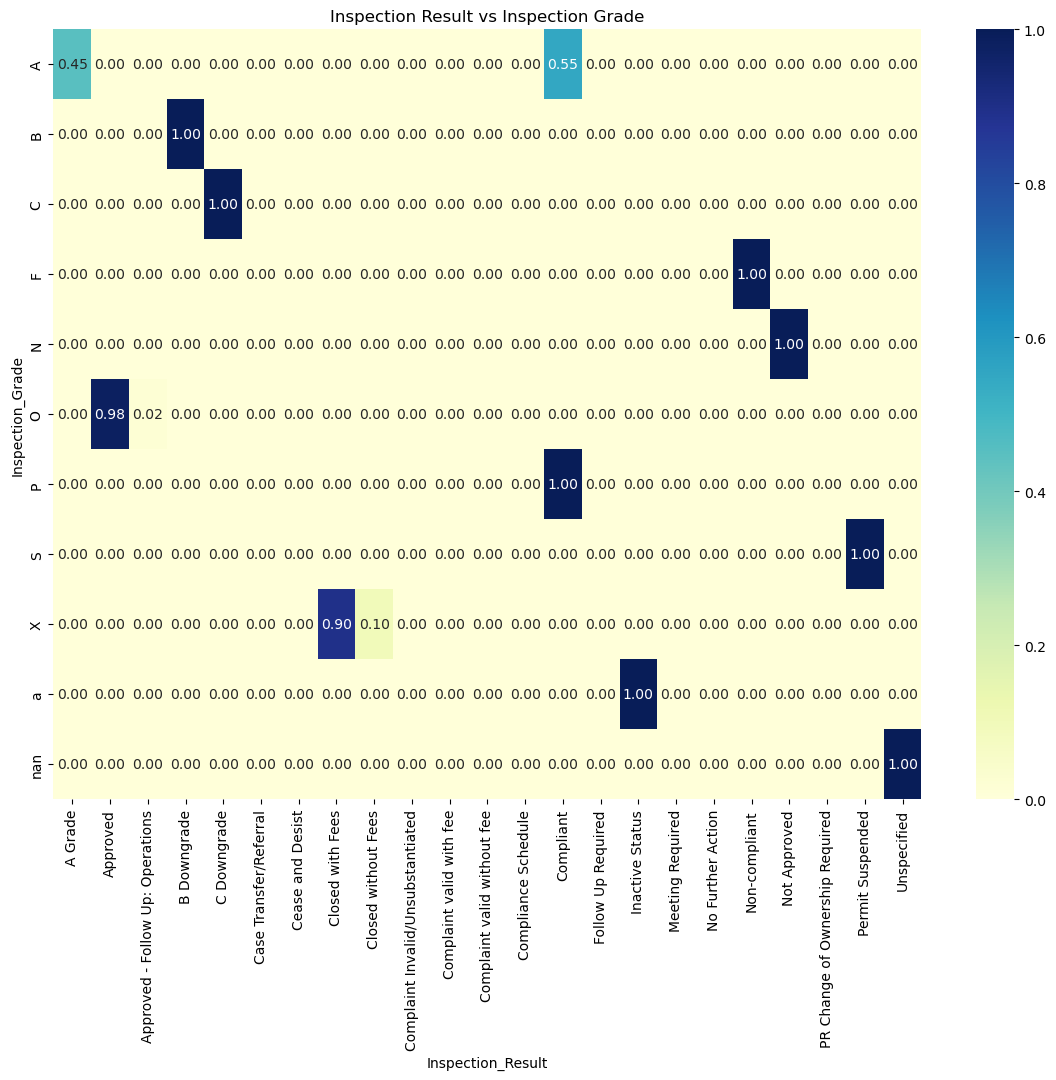

In [19]:
# Review how Inspection_Grade Differs from Inspection_Result

# Create a cross-tabulation (contingency table) of the two categorical columns
cross_tab = pd.crosstab(inspections_df["Inspection_Grade"], inspections_df["Inspection_Result"], normalize = "index")
# Create a heatmap using seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", cbar=True, fmt='.2f')
# Set axis labels and title
plt.xlabel("Inspection_Result")
plt.ylabel("Inspection_Grade")
plt.title("Inspection Result vs Inspection Grade")
# Show the plot
plt.show()

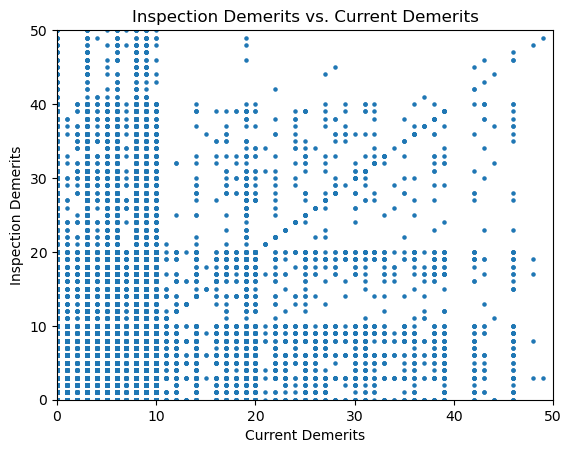

In [20]:
# Review Current Demerits on X axis and Inspection Demerits on Y axis, excluding the few outliers

# Set Graph Formatting
ax = plt.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
# Set Graph Elements (Title, Axis Labels)
ax.set(title = "Inspection Demerits vs. Current Demerits", ylabel = "Inspection Demerits", xlabel = "Current Demerits")
# Plot
plt.scatter(inspections_df["Current_Demerits"], inspections_df["Inspection_Demerits"], s = 5)



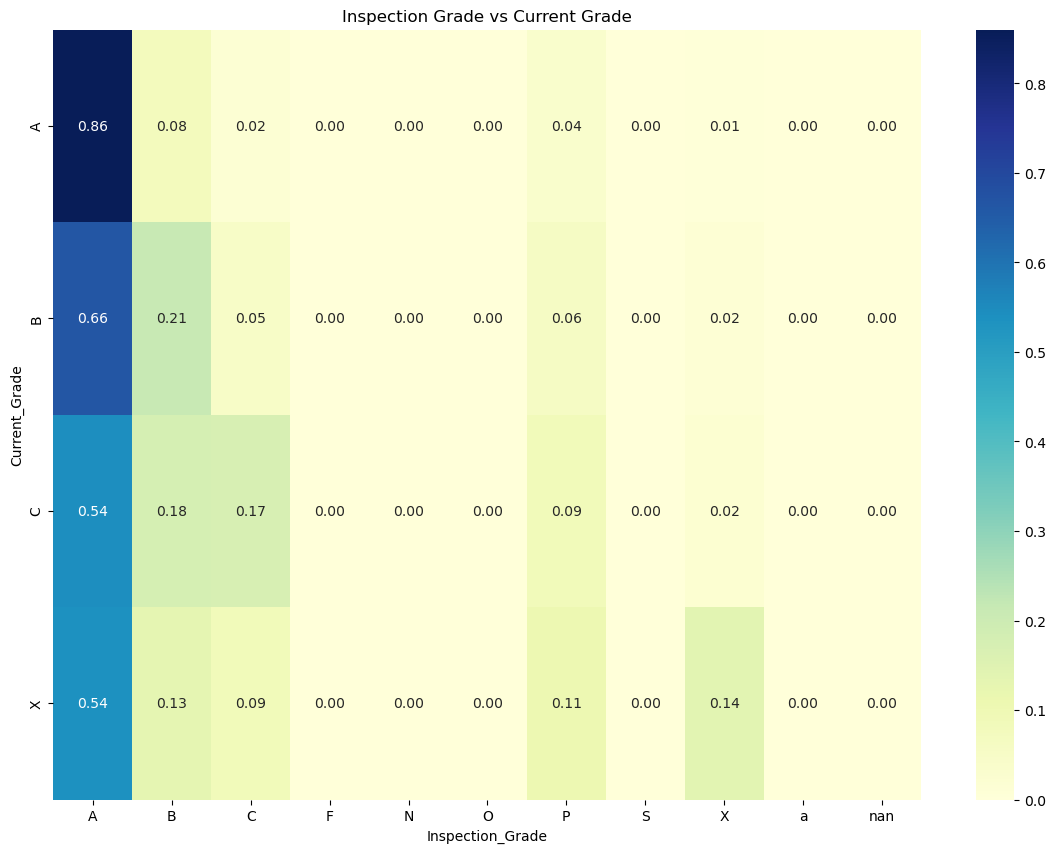

In [21]:
# Review Current Grade on X axis and Inspection Grade on Y axis

# Create a cross-tabulation (contingency table) of the two categorical columns
cross_tab = pd.crosstab(inspections_df["Current_Grade"], inspections_df["Inspection_Grade"], normalize = "index")
# Create a heatmap using seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", cbar=True, fmt='.2f')
# Set axis labels and title
plt.xlabel("Inspection_Grade")
plt.ylabel("Current_Grade")
plt.title("Inspection Grade vs Current Grade")
# Show the plot
plt.show()

For the Bivariate EDA, these graphs and heatmaps are fairly barebone (could be much more extensive, and better formatted if given more time), but we still get important details within these as well.  

Namely:

- We learn the mapping/correspondence of the Inspection Grade and Inspection Result. This answers our earliest question of how we would divide up the explicit labels into our success criteria of pass/fail. Given that A grade seems to map to Inspection Results of primarily "Compliant" and "A Grade", it could seem most logical to consider these Inspection Results as "Pass" and all else as "Fail".

- There is no immediate clear correlation between Current and the resulting Inspection Demerits, a good affirmation to not automatically consider that as a reasonable assumption.

- The Current vs. Inspection Grade heatmap shows that regardless of the current garde, the Inspection Grade majority speaking shows improvement for the establishment in consideration. (i.e. Most percentages of Inspection Grades A given the current grade seem to be above 50%). It would be debatable that there is a trend here and to further investigate, but at least we have a sense of this now.

### EDA Concluding Thoughts/Remarks

With a mix of data curiosity, healthy skepticism, and careful attention to data details - we've gotten very strong ideas about how the layout and trends of the inspection data fare out. Not only do we have a strong conceptual understanding, but we've taken careful attention to prepare our Dataset to follow into the next Modelling section. We took steps to clearly designate how the data attributes should exist and function  (i.e. coercing the data types), and have sectioned out missing data and/or low quality data. 

As mentioned in the EDA remarks in the above sections, there would be many areas of further investigation that would absolutely be beneficial. Aside from these, we could also look to expand upon the data by considering external sources (i.e. Other Datasets that complement or extend off the information given here and/or are relevant to the Inspection Use Case). We touch more on this in the final conclusion.

--------------------------------------------------------------------------------------------

### Initial / v1 Classification Modelling

As discussed up through now from the Opening Remarks section and EDA section, we are set on the type of Model we want to build for our use case: Classification for Pass/Fail of Inspections. 

Recall a few key insights/points we've gathered that should be accounted for in our modelling:

- Not all the variables used in the EDA section will necessarily be predictive in nature. So we can remove variables we expect to provide very little predictive value (i.e. We could hypothesize that as a first-pass, the Employee ID of the inspection will not be overall relevant - without further insight into the employees themselves).

- We will be predicting the Inspection_Result column, which we have conceptually mapped that "Compliant" and "A Grade" are considered Pass - and all other Inspection_Result labels are fail.

- As an extension of the above point, we will be binning the "Inspection Result" column accordingly to reduce the granularity of the Result reasons for simplicity.

- We should be cautious of overfitting, from the imbalanced nature of the Inspection Results from the Dataset. In the Modelling Code to follow, I do incorporate SMOTE as a quick add-in to alleviate some of the imbalance issue. SMOTE described here: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


------------------------------------------------------------------

Our Key Steps in the (first-pass) Modelling Phase will be to:

- Perform any Data Transformations in the Dataset if necessary. This could either to synthesize/derive additional variables to help the model learn, or to re-design a few attributes so that they are better understood by the model. For example, having Start & End dates as isolated variables will not be valuable to the Model Learning - we need to transform this into an idea such as "Time between Start and End Dates" for the Model to use.

- Implement a ML model, or ideally another or two. Having accessible output and performance from two models becomes additionally helpful to discern similar patterns/advantages/interpretations gained from the Modelling process, versus relying solely upon the output of a single model implemented. For assignment brevity, we will just stick to one simple model.

- Be cognizant and aware of the performance of the model, by reviewing the performance metrics. Additionally, consider the non-technical advantages/dis-advantages of the model - interpretation, usability, monitoring, complexity of the results. As a whole, an adoption of the model in the industry greatly relies on the best of both technical and non-technical upsides.

In [22]:
# Recall the Dataset we landed on from EDA
inspections_df.head()

,Serial_Number,Permit_Number,Category_Name,Current_Demerits,Current_Grade,Date_Current,Inspection_Time,Employee_ID,Inspection_Type,Inspection_Demerits,Inspection_Grade,Inspection_Result,Violations
0,DA7WM5CUD,PR0010381,Bar / Tavern,8.0,A,2023-01-31,2023-08-22 13:40:00,EE7001341,Routine Inspection,0.0,A,A Grade,nan
1,DABUR0EPC,PR0135947,Restaurant,5.0,A,2023-08-22,2023-08-22 08:05:00,EE7001809,Routine Inspection,5.0,A,A Grade,nan
2,DAA7DPUZH,PR0007481,Snack Bar,0.0,A,2023-07-18,2023-08-22 09:50:00,EE7001313,Routine Inspection,0.0,A,A Grade,nan
3,DAACDSRKQ,PR0129543,Restaurant,3.0,A,2023-08-22,2023-08-22 10:30:00,EE7001245,Re-inspection,3.0,A,A Grade,nan
4,DAYHQV3LR,PR0007174,Restaurant,6.0,A,2023-08-22,2023-08-22 08:45:00,EE7001808,Routine Inspection,6.0,A,A Grade,nan


In [23]:
# There are a couple transformations that will make this dataset better understood by the model algorithm.

# We should break down the Inspection Time into components of concepts that are insightful. Namely, we can already break this down into Season, Day of the Week, and Period of the Day
######
# Season: Spring, Summer, Fall, Winter (some establishments may have better handling procedures in certain conditions)
conditions = [
    (inspections_df["Inspection_Time"].dt.month.isin(np.arange(1,3))) | (inspections_df["Inspection_Time"].dt.month.isin(np.arange(12,13))), # Dec, Jan, Feb = Winter
    inspections_df["Inspection_Time"].dt.month.isin(np.arange(3,6)), # Mar, Apr, May = Spring
    inspections_df["Inspection_Time"].dt.month.isin(np.arange(6,9)), # Jun, Jul, Aug = Summer
    inspections_df["Inspection_Time"].dt.month.isin(np.arange(9,12)) # Sep, Oct, Nov = Fall
]
choices = ['Winter',
           'Spring',
           'Summer',
           'Fall']
inspections_df['Inspection_Season'] = np.select(conditions, choices)
# Day of the Week: Possibly - Inspections could be more stringent, or more lax depending if it is a busier day of the week or not
inspections_df["Inspection_Day_of_Week"] = inspections_df["Inspection_Time"].dt.day_name()
# Period of the Day: Also related to establishment busy-ness, which can impact inspector/inspectee impressions.
inspections_df['Inspection_Period_of_Day'] = (inspections_df['Inspection_Time'].dt.hour % 24 + 4) // 4  # Calulation of the Hour Element
inspections_df['Inspection_Period_of_Day'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

# We need to Re-map the Inspection_results into Pass/Fail as discussed. As an additional step, we can designate Pass = 1, and Fail = 0. 
# This is how the algorithm interprets positive or negative classifcation
inspections_df["Inspection_Result"] = np.where(inspections_df["Inspection_Result"].isin(["Compliant", "A Grade"]), 1, 0)

# We will be dropping a few unnecessary columns and clean-up redundant columns, as either they provide little predictive value or they provide information that is after-the-fact from the inspection outcome (i.e. Violations)
inspections_df.drop(columns = ["Permit_Number", "Date_Current", "Employee_ID", "Inspection_Time", "Inspection_Demerits", "Inspection_Grade", "Violations"], inplace = True)

# Re-order the Dataset so Inspection_Result is at the end
inspections_df = inspections_df[[col for col in inspections_df.columns if col != 'Inspection_Result'] + ['Inspection_Result']]


In [24]:
# Review how dataset looks so far
inspections_df.head()

,Serial_Number,Category_Name,Current_Demerits,Current_Grade,Inspection_Type,Inspection_Season,Inspection_Day_of_Week,Inspection_Period_of_Day,Inspection_Result
0,DA7WM5CUD,Bar / Tavern,8.0,A,Routine Inspection,Summer,Tuesday,Noon,1
1,DABUR0EPC,Restaurant,5.0,A,Routine Inspection,Summer,Tuesday,Morning,1
2,DAA7DPUZH,Snack Bar,0.0,A,Routine Inspection,Summer,Tuesday,Morning,1
3,DAACDSRKQ,Restaurant,3.0,A,Re-inspection,Summer,Tuesday,Morning,1
4,DAYHQV3LR,Restaurant,6.0,A,Routine Inspection,Summer,Tuesday,Morning,1


Our Preliminary Model of Choice will be Binary Logistic Regression, particularly chosen for the context of this assignment.

Pros:
- It is easy and quick to implement, great for first-pass contexts or for quick deadlines or quick win scenarios in having a ML model done.
- As a less complex model type, it is less prone to overfitting in light of the famous Modelling Concept: Bias-Variance tradeoff 
- It offers parameters to tune that are relatively understandable, so the fine-tuning makes more intuitive sense.
- The Model Output provides metrics and coefficients, which are more digestable and interpretable when communicating to stakeholders and Team Leads on Feature Importances and Model Factors
- It serves as a good baseline for other model types such as Tree-Based Modelling and more complex models like Neural Networks.

Cons:
- Depends on the data having some linear separation in nature (i.e. you can relatively say you could "draw a line" between the decision categories would likely reside as)
- Dependent on a linear relationship between the independent and dependent variables (i.e. Inspection Result as a linear combination of the input variables)

No model will be perfect for a given scenario especially in fast experimentation. But the pros for Binary Logistic Regression make strong enough sense as our choice for this assignment.

In [25]:
# Template Code for a Binary Logistic Regression Model. This is actually from a previous personal project, but was self-written code to generalize for a Logistic Regression Use Case

# Import Packages for Binary Logistic Regression Model
import uuid # Generating a Run ID
import sklearn as sk # Main Modelling Engine Package
import datetime
from imblearn.over_sampling import SMOTE # Used for SMOTE / Upsampling to address Imbalance

## LogisticRegressionDetails() takes a built Logistic Regression model and captures the model details (parameters)
# log_reg_model is a Logistic Regression Model object, assumedly from BuildLogisticRegression()
# Returns: Pandas Dataframe of the Logistic Regression Model Parameters
def LogisticRegressionDetails(log_reg_model):
    # Obtain Feature names in Order
    feature_names = (log_reg_model.feature_names_in_).tolist()
    # Obtain Logistic Regression Model Coefficients in Order
    model_coefficients = (log_reg_model.coef_).tolist()
    # Obtain Logistic Regression Model Intercept
    model_intercept = (log_reg_model.intercept_).tolist()

    # Consolidate into Lists
    detail_data = model_coefficients + model_intercept
    detail_cols = feature_names + ["model_intercept"]

    return detail_data, detail_cols

## LogisticRegressionMetrics() takes a built Logistic Regression model and captures the model classification metrics
# log_reg_model is a Logistic Regression Model object, assumedly from BuildLogisticRegression()
# X/y train/test inputs are Pandas Dataframes of mentioned parts of the learning dataset
# Returns: Pandas Dataframe of the Logistic Regression Model's Metrics
def LogisticRegressionMetrics(log_reg_model, X_train, y_train, X_test, y_test):

    # Generate Various Predictions and Probabilities on Training and Test Sets
    y_train_pred = log_reg_model.predict(X_train)
    y_test_pred = log_reg_model.predict(X_test)

    # Obtain Logistic Regression Model Metrics (which are Classification metrics)
    # In Order: Balanced Accuracy, Precision, Recall, F1 Score, Area under ROC/AUC Curve
    # https://scikit-learn.org/stable/modules/classes.html#classification-metrics

    # Training
    training_acc = round(sk.metrics.balanced_accuracy_score(y_train, y_train_pred), 4)
    training_precision = round(sk.metrics.precision_score(y_train, y_train_pred), 4)
    training_recall = round(sk.metrics.recall_score(y_train, y_train_pred), 4)
    training_f1score = round(sk.metrics.f1_score(y_train, y_train_pred), 4)
    training_rocauc = round(sk.metrics.roc_auc_score(y_train, y_train_pred), 4)
    # Test
    test_acc = round(sk.metrics.balanced_accuracy_score(y_test, y_test_pred), 4)
    test_precision = round(sk.metrics.precision_score(y_test, y_test_pred), 4)
    test_recall = round(sk.metrics.recall_score(y_test, y_test_pred), 4)
    test_f1score = round(sk.metrics.f1_score(y_test, y_test_pred), 4)
    test_rocauc = round(sk.metrics.roc_auc_score(y_test, y_test_pred), 4)

    # Consolidate into Pandas Dataframe
    metrics_data = [training_acc, training_precision, training_recall, training_f1score, training_rocauc,
                    test_acc, test_precision, test_recall, test_f1score, test_rocauc]
    metrics_cols = ["training_acc", "training_precision", "training_recall", "training_f1score", "training_rocauc",
                    "test_acc", "test_precision", "test_recall", "test_f1score", "test_rocauc"]
    metrics_df = pd.DataFrame(columns = metrics_cols)
    metrics_df.loc[len(metrics_df)] = metrics_data

    return metrics_df

## BuildLogisticRegression() constructs a logistic regression model
# input_df is a Pandas dataframe, to build model off of
# id_var is the name of the id column in the dataframe (in string form)
# target_var is the variable to predict on (in string form)
# preprocess_list supplies what pre-processing needs to be done
def BuildLogisticRegression(input_df, id_var, target_var, preprocess_list, version_num):
    # Identify Data Chunks / Predictor and Target Sets
    X_DF = input_df.drop([target_var, id_var], axis = 1)
    y_DF = input_df[target_var]

    # Apply One-Hot-Encode to Categorical Variables, necessary for logistic regression
    # Get Columns that are Categorical, and get columns thats are numerical
    num_cols = [col for col in X_DF.columns if X_DF[col].dtype != "object"]
    cat_cols = [col for col in X_DF.columns if X_DF[col].dtype == "object"]
    # If there are categorical columns, then proceed
    if len(cat_cols) > 0:
        # Designate Columns to be one-hot-encoded, if their cardinality is reasonable (<= 5)
        low_cardinality_cols = [col for col in cat_cols if X_DF[col].nunique() <= 5]
        # Otherwise, drop higher cardinality categorical columns (> 5)
        high_cardinality_cols = list(set(cat_cols)-set(low_cardinality_cols))
        X_DF.drop(high_cardinality_cols, axis = 1, inplace = True)
        # Apply One-Hot-Encoder, Replace the learning dataframe with one-hot-encoded dataframe
        oh = sk.preprocessing.OneHotEncoder(sparse_output=False).set_output(transform="pandas")
        one_hot_encoded = oh.fit_transform(X_DF[low_cardinality_cols])
        X_DF = pd.concat([X_DF, one_hot_encoded], axis=1).drop(columns = low_cardinality_cols)

    # Interpret Preprocess Tasks Requested
    # Known Items are SMOTE, Normalize
    preprocess_upper_tasks = [x.upper() for x in preprocess_list]

    # Prepare a dictionary to hold Preprocesser Engines if they were used
    engine_dict = {}

    # Apply Normalize to Numeric Variables, if requested
    if "NORMALIZE" in preprocess_upper_tasks:
        # Create Normalizer Engine
        normalizer = sk.preprocessing.MinMaxScaler()
        # Apply Normalizer to Training Set Numeric Variables
        X_DF[num_cols] = normalizer.fit_transform(X_DF[num_cols])
        # Add to list of engines used
        engine_dict["NORMALIZE"] = normalizer

    # Split into Train and Test Sets
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_DF, y_DF, test_size=0.2, random_state=42)

    # Apply SMOTE, if requested
    if "SMOTE" in preprocess_upper_tasks:
        # Create Smote Object
        sm = SMOTE(random_state = 42)
        # Apply SMOTE to Training Set
        X_train, y_train = sm.fit_resample(X_train, y_train)
        # Add to list of engines used
        engine_dict["SMOTE"] = sm

    # Start Stopwatch for training time
    training_start_time = datetime.datetime.now()

    # Designate the HyperParameters. These can just be default as described on the scikit-learn logistic regression page, for now
    penalty_param = "l2"
    dual_param = False
    tol_param = 0.0001
    c_param = 1.0
    fit_intercept_param = True
    intercept_scaling_param = 1
    class_weight_param = None
    random_state_param = None
    solver_param = "lbfgs"
    max_iter_param = 100
    multi_class_param = "auto"
    verbose_param = 0
    warm_start_param = False
    n_jobs_param = None
    l1_ratio_param = None

    # Train the Logistic Regression Model
    # Use hyperparameters that correspond to the version number, in hyperparamter table in snowflake
    log_reg_model = sk.linear_model.LogisticRegression(penalty=penalty_param, dual=dual_param, tol=tol_param, 
                                                       C=c_param, fit_intercept=fit_intercept_param, intercept_scaling=intercept_scaling_param, 
                                                       class_weight=class_weight_param, random_state=random_state_param, solver=solver_param, 
                                                       max_iter=max_iter_param, multi_class=multi_class_param, verbose=verbose_param, 
                                                       warm_start=warm_start_param, n_jobs=n_jobs_param, l1_ratio=l1_ratio_param).fit(X_train, y_train)

    # End Stopwatch for training time
    training_end_time = datetime.datetime.now()

    # Capture the fitted parameters in Pandas dataframe table
    # Function to convert a full list to string representation
    def listToString(s):
        # initialize an empty string
        sep = ","
        # return string
        return (sep.join(map(str, s)))
    log_reg_model_details_data = listToString(LogisticRegressionDetails(log_reg_model)[0])
    log_reg_model_details_cols = listToString(LogisticRegressionDetails(log_reg_model)[1])
    details_data = {'model_features': log_reg_model_details_cols, 'model_coefficients': log_reg_model_details_data}
    details_data = {k:[v] for k,v in details_data.items()}  # WORKAROUND
    log_reg_model_details_df = pd.DataFrame(data = details_data)

    # Add Additional Info
    # Calculate training time duration in seconds
    training_time_sec = (training_end_time - training_start_time).total_seconds()
    log_reg_model_details_df["training_time_sec"] = training_time_sec
    # Capture Pre-processing Tasks
    if "SMOTE" in engine_dict:
        log_reg_model_details_df["smote_applied"] = "Yes"
    else:
        log_reg_model_details_df["smote_applied"] = "No"
    if "NORMALIZE" in engine_dict:
        log_reg_model_details_df["normalize_applied"] ="Yes"
    else:
        log_reg_model_details_df["normalize_applied"] = "No"
    
    # Capture the model performance metrics in Pandas dataframe table
    log_reg_model_metrics = LogisticRegressionMetrics(log_reg_model, X_train, y_train, X_test, y_test)

    # Returns: a Logistic Regression Object, a Pandas Dataframe of Fitted Model Parameters, a Pandas Dataframe of Model Metrics
    # optionally: corresponding training and test sets
    return log_reg_model, log_reg_model_details_df, log_reg_model_metrics, engine_dict, X_train, y_train, X_test, y_test

## PredictLogisticRegression() uses a Logistic Regression model and predicts with input dataset
# log_reg_model is a Logistic Regression Model object, assumedly from BuildLogisticRegression()
# prediction_dataset is the Pandas dataframe, to generate predictions on. Handles if ID and Target Variable Columns are present
# id_var is the id column in the dataset (in string form)
# target_var is the variable to predict on (in string form)
def PredictLogisticRegression(log_reg_model, engine_dict, predict_on_dataset, id_var, target_var):
    # Get 2 Copy Forms of Dataset to Work wtih, 1 for running the model on and one for visual output of dataset original representation
    pred_df = predict_on_dataset.copy(deep = True)
    output_df = predict_on_dataset.copy(deep = True)

    # Predict_on_dataset should only contain columns that log_reg_model is training on (i.e. no id_var, target_var) 
    # Remove these if present during prediction, but save them and append back later
    if id_var in pred_df.columns:
        pred_df.drop(id_var, inplace = True, axis = 1)
    if target_var in pred_df.columns:
        pred_df.drop(target_var, inplace = True, axis = 1)

    # Re-form Dataset to Predict on, as required by logistic regression (i.e. One Hot Encoding)
    # Apply One-Hot-Encode to Categorical Variables, necessary for logistic regression
    # Get Columns that are Categorical, and get columns thats are numerical
    num_cols = [col for col in pred_df.columns if pred_df[col].dtype != "object"]
    cat_cols = [col for col in pred_df.columns if pred_df[col].dtype == "object"]
    # If there are categorical columns, then proceed
    if len(cat_cols) > 0:
        # Designate Columns to be one-hot-encoded, if their cardinality is reasonable (<= 5)
        low_cardinality_cols = [col for col in cat_cols if pred_df[col].nunique() <= 5]
        # Otherwise, drop higher cardinality categorical columns (> 5)
        high_cardinality_cols = list(set(cat_cols)-set(low_cardinality_cols))
        pred_df.drop(high_cardinality_cols, axis = 1, inplace = True)
        # Apply One-Hot-Encoder, Replace the learning dataframe with one-hot-encoded dataframe
        oh = sk.preprocessing.OneHotEncoder(sparse_output = False).set_output(transform="pandas")
        one_hot_encoded = oh.fit_transform(pred_df[low_cardinality_cols])
        pred_df = pd.concat([pred_df, one_hot_encoded], axis=1).drop(columns = low_cardinality_cols)

    # Normalize In Same Way as During Model Building, if it was a pre-processing step done
    if "NORMALIZE" in engine_dict:
        # Apply Normalizer to Training Set Numeric Variables
        pred_df[num_cols] = engine_dict["NORMALIZE"].fit_transform(pred_df[num_cols])

    # Use Trained Logistic Regression Object to predict labels and probabilities
    y_predictions = log_reg_model.predict(pred_df)
    y_prediction_probs = log_reg_model.predict_proba(pred_df)

    # Create name for prediction column
    pred_variable_name = target_var + "_Pred"
    proba_variable_name = "Proba_" + target_var + "_Pred"

    # Append predictions to dataset to predict on
    output_df[pred_variable_name] = y_predictions
    output_df[proba_variable_name] = y_prediction_probs[:, 1]
        
    # Returns: a Pandas dataframe, containing the prediction_dataset along with appended prediction values
    return output_df

## RunLogisticRegression executes all related Logistic Regression functions, and push prediction output, Model Parameters/Metrics and Run Details to corresponding tables in Snowflake DB
def RunLogisticRegression(learning_df, preprocess_list, version_num, id_var, target_var, pred_df, use_case_desc, display_output):
    # Get Run Timestamp
    run_timestamp = datetime.datetime.now(tz = datetime.timezone.utc)
    string_run_timestamp = run_timestamp.strftime("%Y-%m-%dT%H:%M:%S%z")
    # Generate a RunID
    run_ID = str(uuid.uuid4())

    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Beginning RunLogisticRegression() with Run Timestamp: " + string_run_timestamp + " and Run ID as: " + str(run_ID))
        print("")

    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Running BuildLogisticRegression() at: " + string_run_timestamp)
    # Run Core Logistic Regression Functions
    LogRegRun = BuildLogisticRegression(learning_df, id_var, target_var, preprocess_list, version_num)

    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Finished BuildLogisticRegression() at: " + string_run_timestamp)
        print("")

    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Running PredictLogisticRegression() at: " + string_run_timestamp)
    # Generate Full Model Predictions Table
    FullLogRegPredOutput = PredictLogisticRegression(LogRegRun[0], LogRegRun[3], pred_df, id_var, target_var)
    # Keep Only ID and Output Columns
    LogRegPredOutput = FullLogRegPredOutput[[id_var, target_var, target_var + "_Pred", "Proba_" + target_var + "_Pred"]]
    # Append Run Info
    LogRegPredOutput["run_timestamp"] = string_run_timestamp
    LogRegPredOutput["run_id"] = run_ID
    LogRegPredOutput["model_name"] = "Binary Logistic Regression"
    LogRegPredOutput["model_version_num"] = version_num
    # Assert Column Names to All Caps
    LogRegPredOutput.columns = map(lambda x: str(x).upper(), LogRegPredOutput.columns)
    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Finished PredictLogisticRegression() at: " + string_run_timestamp)
        print("")

    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Building Model Details Table at: " + string_run_timestamp)
    # Generate Model Parameters Table
    StagingModelDetailsDF = LogRegRun[1]
    # Append Run Info
    StagingModelDetailsDF["run_timestamp"] = string_run_timestamp
    StagingModelDetailsDF["run_id"] = run_ID
    StagingModelDetailsDF["use_case"] = use_case_desc
    StagingModelDetailsDF["model_version_num"] = version_num
    # Assert Column Names to All Caps
    StagingModelDetailsDF.columns = map(lambda x: str(x).upper(), StagingModelDetailsDF.columns)
    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Model Details Table Built at: " + string_run_timestamp)
        print("")

    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Building Metrics Table at: " + string_run_timestamp)
    # Generate Model Metrics Table
    StagingMetricsDF = LogRegRun[2]
    # Append Run Info
    StagingMetricsDF["run_timestamp"] = string_run_timestamp
    StagingMetricsDF["run_id"] = run_ID
    StagingMetricsDF["use_case"] = use_case_desc
    StagingMetricsDF["model_version_num"] = version_num
    # Assert Column Names to All Caps
    StagingMetricsDF.columns = map(lambda x: str(x).upper(), StagingMetricsDF.columns)
    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        print("Metrics Table Built at: " + string_run_timestamp)
        print("")

    # Print Status of Execution
    if display_output.upper() in ["Y", "YES"]:
        time_now = datetime.datetime.now(tz = datetime.timezone.utc)
        total_timesec_spent = (time_now - run_timestamp).total_seconds()
        print("RunLogisticRegression() Complete. Time Taken (in Seconds): " + str(round(float(total_timesec_spent), 2)))
        print("")

    # Alias the training and testing sets for output access
    X_train_output = LogRegRun[4]
    y_train_output = LogRegRun[5]
    X_test_output = LogRegRun[6]
    y_test_output = LogRegRun[7]

    return LogRegRun, FullLogRegPredOutput, LogRegPredOutput, StagingModelDetailsDF, StagingMetricsDF, X_train_output, y_train_output, X_test_output, y_test_output


In [26]:
# Run Our Logistic Regression Code, with our Inspections DF
model_result = RunLogisticRegression(learning_df = inspections_df, 
                                     preprocess_list = ["SMOTE", "NORMALIZE"], 
                                     version_num = "v1", 
                                    id_var = "Serial_Number", 
                                    target_var = "Inspection_Result", 
                                    pred_df = inspections_df, 
                                    use_case_desc = "Inspections Pass/Fail Prediction", 
                                    display_output = "y")

Beginning RunLogisticRegression() with Run Timestamp: 2024-03-21T02:44:46+0000 and Run ID as: c8026e7d-fe7e-469b-ac36-6b02d38cfc56

Running BuildLogisticRegression() at: 2024-03-21T02:44:46+0000
Finished BuildLogisticRegression() at: 2024-03-21T02:44:46+0000

Running PredictLogisticRegression() at: 2024-03-21T02:44:46+0000
Finished PredictLogisticRegression() at: 2024-03-21T02:44:46+0000

Building Model Details Table at: 2024-03-21T02:44:46+0000
Model Details Table Built at: 2024-03-21T02:44:46+0000

Building Metrics Table at: 2024-03-21T02:44:46+0000
Metrics Table Built at: 2024-03-21T02:44:46+0000

RunLogisticRegression() Complete. Time Taken (in Seconds): 10.94



C:\Users\davidli\AppData\Local\Temp\ipykernel_1816\1122608691.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LogRegPredOutput["run_timestamp"] = string_run_timestamp
C:\Users\davidli\AppData\Local\Temp\ipykernel_1816\1122608691.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LogRegPredOutput["run_id"] = run_ID
C:\Users\davidli\AppData\Local\Temp\ipykernel_1816\1122608691.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [27]:
# Verify that we have a table full of Truth vs. Predicted Inspection Results that the model can generate
model_result[1] # Prediction Table

# Prediction Variable Column is Inspection_Result_Pred

,Serial_Number,Category_Name,Current_Demerits,Current_Grade,Inspection_Type,Inspection_Season,Inspection_Day_of_Week,Inspection_Period_of_Day,Inspection_Result,Inspection_Result_Pred,Proba_Inspection_Result_Pred
0,DA7WM5CUD,Bar / Tavern,8.0,A,Routine Inspection,Summer,Tuesday,Noon,1,0,0.453962
1,DABUR0EPC,Restaurant,5.0,A,Routine Inspection,Summer,Tuesday,Morning,1,0,0.469549
2,DAA7DPUZH,Snack Bar,0.0,A,Routine Inspection,Summer,Tuesday,Morning,1,0,0.495645
3,DAACDSRKQ,Restaurant,3.0,A,Re-inspection,Summer,Tuesday,Morning,1,1,0.717028
4,DAYHQV3LR,Restaurant,6.0,A,Routine Inspection,Summer,Tuesday,Morning,1,0,0.464345
...,...,...,...,...,...,...,...,...,...,...,...
329676,DA0399320,Restaurant,6.0,A,Routine Inspection,Fall,Monday,Noon,0,0,0.492949
329677,DA0042574,Special Kitchen,0.0,A,Routine Inspection,Summer,Monday,Noon,0,0,0.495645
329678,DA0416305,Bar / Tavern,3.0,A,Routine Inspection,Spring,Monday,Noon,0,1,0.505153
329679,DA1799055,Meat/Poultry/Seafood,5.0,A,Routine Inspection,Summer,Sunday,Noon,1,0,0.469549


In [28]:
# Verify we have a table to reference the model performance metrics
model_result[4]

,TRAINING_ACC,TRAINING_PRECISION,TRAINING_RECALL,TRAINING_F1SCORE,TRAINING_ROCAUC,TEST_ACC,TEST_PRECISION,TEST_RECALL,TEST_F1SCORE,TEST_ROCAUC,RUN_TIMESTAMP,RUN_ID,USE_CASE,MODEL_VERSION_NUM
0,0.5637,0.5751,0.4883,0.5281,0.5637,0.5621,0.9164,0.4849,0.6342,0.5621,2024-03-21T02:44:46+0000,c8026e7d-fe7e-469b-ac36-6b02d38cfc56,Inspections Pass/Fail Prediction,v1


------------------------------------------------------------------------------

### Modeling Concluding Thoughts / Remarks

Our Modelling was complete and we were able to obtain labeled predictions as well as metrics of the overall performance.

There are multiple comments to be made in terms of the performance with Binary Logistic Regression for the Inspections Dataset:
(Precision, Recall, F1 Score, ROCAUC metrics are key classification metrics, but their definitions will be left as reference from as simple as a google search.

 https://deepchecks.com/f1-score-accuracy-roc-auc-and-pr-auc-metrics-for-models/#:~:text=Precision%20measures%20how%20many%20of%20the%20predicted%20positive,model%20has%20a%20low%20rate%20of%20false%20negatives.

 However, it is critical to understand the definitions as these are what should be reviewed together with other Data Scientists, Team Leads, and Stakeholders as model improvements, enhancements, and development progress in a more extensive project)

- The performance of Binary Logistic Regression is straightforwardly mediocre. The metrics as a whole describe the model being only slightly marginally better than guessing or flipping a coin (i.e. 50%). But it isn't reached the point where it is entirely useless (i.e. < 50%)
- The metrics all support a common point - the imbalance of the dataset makes it extremely difficult to determine the decision boundary / separation criteria between Pass/Fail from the sheer disproportion of more Pass data in combination with very little attributes we currently have. It is absolutely a factor that we have significant number of data rows, but not enough columns/data attributes to clearly make distinguishments even with the model's attempt.
- Though we could tune the parameters of the model to increase some accuracy amounts, it would be marginal as the root issues of the quantity of data is likely playing a much bigger part here.

As a bottom line, we learned this dataset is in need of more data attributes to provide more information around the inspections to further help distinguish what might lead to Pass and Fails. Having more Fail data to balance out with Pass data would help the model learn more evenly as well, and generalize much better.

From the above, the Data Scientist expertise should provide direction to the overall project team that this is the main bottleneck for model performance. Development could continue on other model types, but it would be key to address this as a limitation across the board that can hopefully be addressed. Other options such as exploring external data (i.e. Data describing each individual Restaurant such as Restaurant Handling Practices, Guidelines, Capacity, Hours of Operation, etc.) would augment the data available to use as well.